# Introduction to Pandas

## What is it?
**pandas** is an open source **Python** library for data analysis. Python has always been great for prepping and munging data, but it's never been great for analysis - you'd usually end up using **R** or loading it into a database and using SQL (or worse, Excel). pandas makes Python great for analysis.

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

**pandas** is well suited for many different kinds of data:

  - Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
  - Ordered and unordered (not necessarily fixed-frequency) time series data.
  - Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
  - Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, **Series** (1-dimensional) and **DataFrame** (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users, **DataFrame** provides everything that R’s data.frame provides and much more. *pandas* is built on top of *NumPy* and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:

  - Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
  - Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
  - Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
  - Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
  - Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
  - Intuitive merging and joining data sets
  - Flexible reshaping and pivoting of data sets
  - Hierarchical labeling of axes (possible to have multiple labels per tick)
  - Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
  - Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

## Data Structures
**pandas** introduces two new data structures to Python - **Series** and **DataFrame**, both of which are built on top of NumPy (this means it's fast).

In [1]:
%pylab inline
import pandas as pd
pd.set_option('max_columns', 50)

Populating the interactive namespace from numpy and matplotlib


## Series
A **Series** is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [2]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

Alternatively, you can specify an index to use when creating the Series.

In [3]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'], index=['A', 'Z', 'C', 'Y', 'E'])
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [4]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

You can use the index to select specific items from the Series ...

In [5]:
cities['Chicago']

1000.0

In [6]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

Or you can use boolean indexing for selection.

In [7]:
cities[cities < 1000]

Austin      450.0
Portland    900.0
dtype: float64

That last one might be a little weird, so let's make it more clear - cities < 1000 returns a Series of True/False values, which we then pass to our Series cities, returning the corresponding True items.

In [8]:
less_than_1000 = cities < 1000
print(less_than_1000)
print('\n')
print(cities[less_than_1000])

Austin            True
Boston           False
Chicago          False
New York         False
Portland          True
San Francisco    False
dtype: bool


Austin      450.0
Portland    900.0
dtype: float64


You can also change the values in a Series on the fly.

In [9]:
# changing based on the index
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

Old value: 1000.0
New value: 1400.0


In [10]:
# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print(cities[cities < 1000])

Austin      450.0
Portland    900.0
dtype: float64


Austin      750.0
Portland    750.0
dtype: float64


What if you aren't sure whether an item is in the Series? You can check using idiomatic Python.

In [11]:
print('Seattle' in cities)
print('San Francisco' in cities)

False
True


Mathematical operations can be done using scalars and functions.

In [12]:
# divide city values by 3
cities / 3

Austin           250.000000
Boston                  NaN
Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
dtype: float64

In [13]:
# square city values
square(cities)

Austin            562500.0
Boston                 NaN
Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
dtype: float64

You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).

In [14]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


Notice that because Austin, Chicago, and Portland were not found in both Series, they were returned with NULL/NaN values.

NULL checking can be performed with isnull and notnull.

In [15]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [16]:
# use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool


Boston   NaN
dtype: float64


## DataFrame
A **DataFrame** is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

For the rest of the tutorial, we'll be primarily working with DataFrames.

### Reading Data
To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.

Using the columns parameter allows us to tell the constructor how we'd like the columns ordered. By default, the DataFrame constructor will order the columns alphabetically (though this isn't the case when reading from a file - more on that next).

In [17]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


Much more often, you'll have a dataset you want to read into a DataFrame. Let's go through several common ways of doing so.

### CSV

Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

In [18]:
# Source: baseball-reference.com/players/r/riverma01.shtml
!head -n 5 titanic.csv

survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.25,S,Third,man,True,,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,3,female,26.0,0,0,7.925,S,Third,woman,False,,Southampton,yes,True
1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False


### Demonstation of pandas on Titanic dataset

In [19]:
df = pd.read_csv('titanic.csv')

**pandas**' various reader functions have many parameters allowing you to do things like skipping lines of the file, parsing dates, or specifying how to handle NA/NULL datapoints.

There's also a set of writer functions for writing to a variety of formats (CSVs, HTML tables, JSON). They function exactly as you'd expect and are typically called to_format:

    my_dataframe.to_csv('path_to_file.csv')

Take a look at [the IO documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) to familiarize yourself with file reading/writing functionality.

### Excel

Know who hates VBA? Me. I bet you do, too. Thankfully, pandas allows you to read and write Excel files, so you can easily read from Excel, write your code in Python, and then write back out to Excel - no need for VBA.

So back to out dataset. Get some information about dataset.

### Working with DataFrames

Now that we can get data into a DataFrame, we can finally start working with them. **pandas** has an abundance of functionality, far too much for me to cover in this introduction. I'd encourage anyone interested in diving deeper into the library to check out its [excellent documentation](http://pandas.pydata.org/pandas-docs/stable/). Or just use Google - there are a lot of Stack Overflow questions and blog posts covering specifics of the library.

### Inspection
**pandas** has a variety of functions for getting basic information about your DataFrame, the most basic of which is using the info method.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


The output tells a few things about our DataFrame.

 - It's obviously an instance of a DataFrame.
 - Each row was assigned an index of 0 to N-1, where N is the number of rows in the DataFrame. pandas will do this by default if an index is not specified. Don't worry, this can be changed later.
 - There are 891 rows (every row must have an index).
 - Our dataset has 15 columns, where few has missing some values (age, embarked, deck and embark_town).
 - The last datatypes of each column, but not necessarily in the corresponding order to the listed columns. You should use the dtypes method to get the datatype for each column.
 - An approximate amount of RAM used to hold the DataFrame. See the .memory_usage method

DataFrame's also have a describe method, which is great for seeing basic statistics about the dataset's numeric columns. Be careful though, since this will return information on all columns of a numeric datatype.

In [21]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


You will notice that I've used the head method regularly throughout this lecture - by default, head displays the first five records of the dataset, while tail displays the last five.

In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Alternatively, Python's regular slicing syntax works as well.

In [24]:
df[10:16]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True


In [25]:
df.shape

(891, 15)

In [26]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

## Selecting data

You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific columns.

Selecting a single column from the DataFrame will return a Series object.

In [27]:
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [28]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

To select multiple columns, simply pass a list of column names to the DataFrame, the output of which will be a DataFrame.

In [29]:
df[['age', 'survived']].head()

,age,survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


## Selecting with conditions
Row selection can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.

In [30]:
df.age[df.age > 35].head()

1     38.0
6     54.0
11    58.0
13    39.0
15    55.0
Name: age, dtype: float64

In [31]:
df[df.age > 35].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True


In [32]:
print(df.iloc[10])
df.iloc[[1, 50, 300]]

survived                 1
pclass                   3
sex                 female
age                      4
sibsp                    1
parch                    1
fare                  16.7
embarked                 S
class                Third
who                  child
adult_male           False
deck                     G
embark_town    Southampton
alive                  yes
alone                False
Name: 10, dtype: object


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
300,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True


The simplified rules of indexing are:

 - Use loc for label-based indexing
 - Use iloc for positional indexing

I've found that I can usually get by with boolean indexing, loc and iloc, but pandas has a whole host of other ways to do selection.

## Counting

In [33]:
df[df.survived == 1].count()

survived       342
pclass         342
sex            342
age            290
sibsp          342
parch          342
fare           342
embarked       340
class          342
who            342
adult_male     342
deck           136
embark_town    340
alive          342
alone          342
dtype: int64

In [34]:
df.survived[df.survived == 1].count()

342

In [35]:
df['log10age'] = log10(df.age)

In [36]:
df.who.value_counts(normalize=True)

man      0.602694
woman    0.304153
child    0.093154
Name: who, dtype: float64

### Compute a simple cross-tabulation

In [37]:
pd.crosstab(df['class'], df.survived)

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [38]:
df.survived[df.age < 5].value_counts()

1    27
0    13
Name: survived, dtype: int64

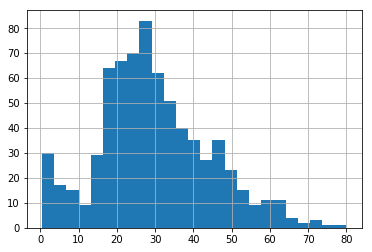

In [39]:
df.age.hist(bins=25)

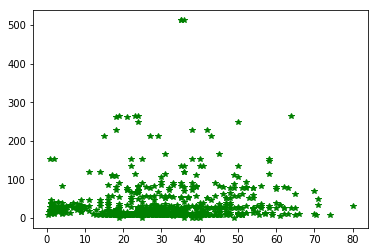

In [40]:
plot(df.age, df.fare, 'g*')

In [41]:
df.fare.sum()

28693.9493

In [42]:
df.fare[df.sex == 'male'].sum()

14727.286500000002

In [43]:
df.fare[df.sex == 'female'].sum()

13966.6628

In [44]:
df.groupby('who')['fare'].sum()

who
child     2721.2210
man      13352.0656
woman    12620.6627
Name: fare, dtype: float64